#  Case Study: Light Theme and Dark Theme

An online bookstore is looking to *optimize its website design* to *improve user engagement* and ultimately *increase book purchases*. The website currently 
offers two themes for its users: `Light Theme` and `Dark Theme`. The bookstore’s data science team wants to conduct an `A/B testing` experiment to determine 
which theme leads to better user engagement and `higher conversion rates` for book purchases.

The data collected by the bookstore contains user interactions and engagement metrics for both the Light Theme and Dark Theme. The dataset includes the following key features:

- **Theme**: dark or light
- **Click Through Rate**: The proportion of the users who click on links or buttons on the website.
- **Conversion Rate**: The percentage of users who signed up on the platform after visiting for the first time.
- **Bounce Rate**: The percentage of users who leave the website without further interaction after visiting a single page.
- **Scroll Depth**: The depth to which users scroll through the website pages.
- **Age**: The age of the user.
- **Location**: The location of the user.
- **Session Duration**: The duration of the user’s session on the website.
- **Purchases**: Whether the user purchased the book (Yes/No).
- **Added_to_Cart**: Whether the user added books to the cart (Yes/No)

In [69]:
# Import libraries

import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Load dataset
data = pd.read_csv('data\website_ab_test.csv')
data.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [71]:
# Dataset summary
summary = {
    'Number of Records': data.shape[0],
    'Number of Columns': data.shape[1],
    'Missing Values': data.isnull().sum(),
    'Data Overview': data.info()
}

summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


{'Number of Records': 1000,
 'Number of Columns': 10,
 'Missing Values': Theme                 0
 Click Through Rate    0
 Conversion Rate       0
 Bounce Rate           0
 Scroll_Depth          0
 Age                   0
 Location              0
 Session_Duration      0
 Purchases             0
 Added_to_Cart         0
 dtype: int64,
 'Data Overview': None}

In [72]:
data.describe()

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.256048,0.253312,0.505758,50.319494,41.528000,924.999000
std,0.139265,0.139092,0.172195,16.895269,14.114334,508.231723
min,0.010767,0.010881,0.200720,20.011738,18.000000,38.000000
25%,0.140794,0.131564,0.353609,35.655167,29.000000,466.500000
50%,0.253715,0.252823,0.514049,51.130712,42.000000,931.000000
75%,0.370674,0.373040,0.648557,64.666258,54.000000,1375.250000
max,0.499989,0.498916,0.799658,79.997108,65.000000,1797.000000


Checking Distributions of Numerical columns

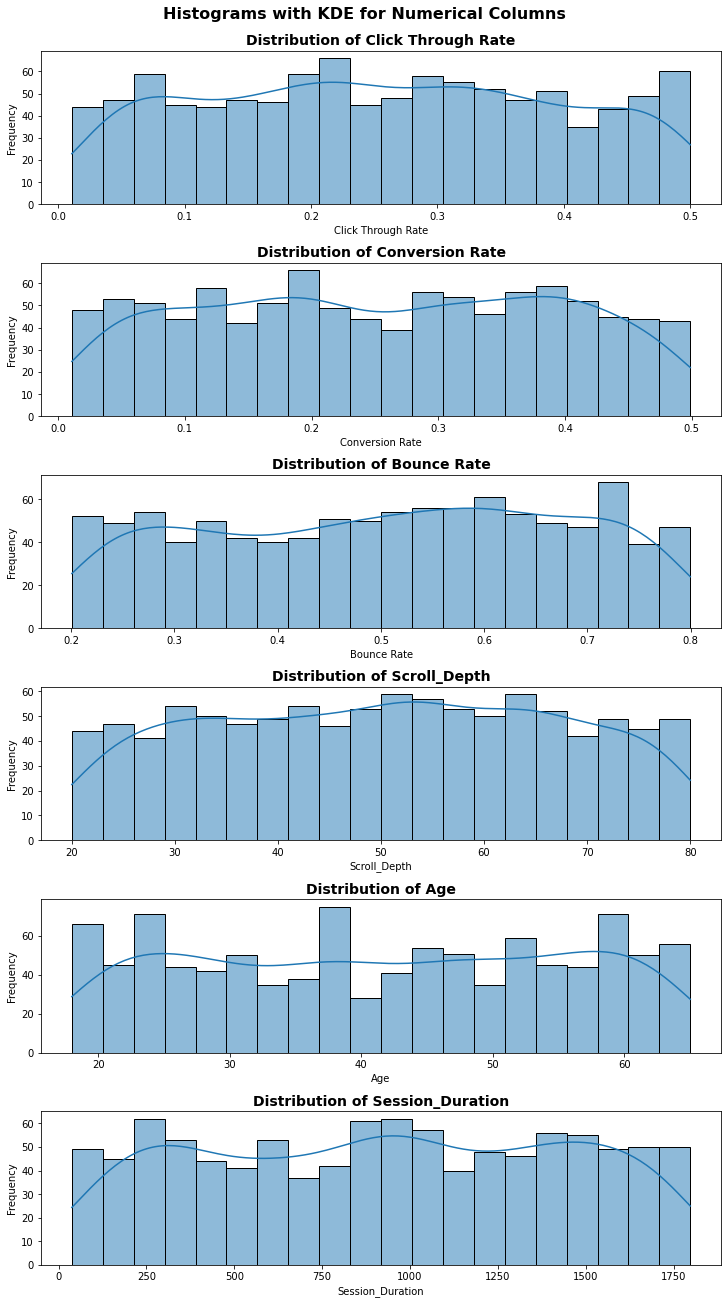

In [73]:
# Select numerical columns
numeric_columns = data.select_dtypes(include='number').columns

# Set up a grid of subplots
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, len(numeric_columns) * 3), constrained_layout=True)

# Plot each histogram with KDE
for ax, col in zip(axes, numeric_columns):
    sns.histplot(data[col], bins=20, kde=True, edgecolor='black', ax=ax)
    ax.set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.suptitle("Histograms with KDE for Numerical Columns", fontsize=16, fontweight='bold')
plt.show()

In [74]:
# grouping data by theme and calculating mean values for the metrics
theme_performance = data.groupby('Theme').mean()

# sorting the data by conversion rate for a better comparison
theme_performance_sorted = theme_performance.sort_values(by='Conversion Rate', ascending=False)

theme_performance_sorted

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
Theme,,,,,,
Light Theme,0.247109,0.255459,0.499035,50.735232,41.734568,930.833333
Dark Theme,0.264501,0.251282,0.512115,49.926404,41.332685,919.482490


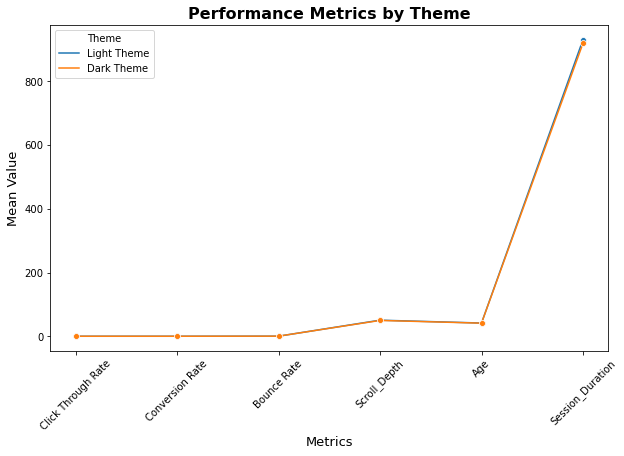

In [75]:
# Reset the index, specifying drop=True to prevent level_0 and index columns
theme_performance_sorted = theme_performance_sorted.reset_index()

# Melt the DataFrame to make it suitable for line plotting with Seaborn
theme_melted = theme_performance_sorted.melt(id_vars='Theme', var_name='Metric', value_name='Value')

# Create the line plot with one line per theme
plt.figure(figsize=(10, 6))
sns.lineplot(data=theme_melted, x='Metric', y='Value', hue='Theme', marker='o')

# Set plot title and labels
plt.title("Performance Metrics by Theme", fontsize=16, fontweight='bold')
plt.xlabel("Metrics", fontsize=13)
plt.ylabel("Mean Value", fontsize=13)
plt.xticks(rotation=45)  # Rotate x-axis labels if there are many metrics

plt.show()

### Getting Started with Hypothesis Testing

In [80]:
# Extract conversion rates for both themes
conversion_rates_light = data[data['Theme'] == 'Light Theme']['Conversion Rate']
conversion_rates_dark = data[data['Theme'] == 'Dark Theme']['Conversion Rate']

# performing a two-sample t-test
t_stat, p_value = ttest_ind(conversion_rates_light, conversion_rates_dark, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.4748494462782696, P-value: 0.6349982678451735


In [81]:
# extracting click through rates for both themes
ctr_light = data[data['Theme'] == 'Light Theme']['Click Through Rate']
ctr_dark = data[data['Theme'] == 'Dark Theme']['Click Through Rate']

# performing a two-sample t-test
t_stat_ctr, p_value_ctr = ttest_ind(ctr_light, ctr_dark, equal_var=False)

print(f"T-statistic: {t_stat_ctr}, P-value: {p_value}_ctr")

T-statistic: -1.9781708664172253, P-value: 0.6349982678451735_ctr


In [82]:
# extracting bounce rates for both themes
bounce_rates_light = data[data['Theme'] == 'Light Theme']['Bounce Rate']
bounce_rates_dark = data[data['Theme'] == 'Dark Theme']['Bounce Rate']

# performing a two-sample t-test for bounce rate
t_stat_bounce, p_value_bounce = ttest_ind(bounce_rates_light, bounce_rates_dark, equal_var=False)

# extracting scroll depths for both themes
scroll_depth_light = data[data['Theme'] == 'Light Theme']['Scroll_Depth']
scroll_depth_dark = data[data['Theme'] == 'Dark Theme']['Scroll_Depth']

# performing a two-sample t-test for scroll depth
t_stat_scroll, p_value_scroll = ttest_ind(scroll_depth_light, scroll_depth_dark, equal_var=False)

# creating a table for comparison
comparison_table = pd.DataFrame({
    'Metric': ['Click Through Rate', 'Conversion Rate', 'Bounce Rate', 'Scroll Depth'],
    'T-Statistic': [t_stat_ctr, t_stat, t_stat_bounce, t_stat_scroll],
    'P-Value': [p_value_ctr, p_value, p_value_bounce, p_value_scroll]
})

comparison_table

,Metric,T-Statistic,P-Value
0,Click Through Rate,-1.978171,0.048184
1,Conversion Rate,0.474849,0.634998
2,Bounce Rate,-1.201888,0.229692
3,Scroll Depth,0.756228,0.449692
